![Logo](https://www.up.edu.mx/wp-content/themes/panamericana/img/logo-footer.png)

# **Tarea 4: Regresión lineal Simple Formas Funcionales**

## **Asignatura:** Econometría  
## **Profesora:** Mae. Julieta María Sarralde

---

**Nombre del Alumno:**  
Luis Enrique Noguera Gil

**Fecha de entrega:**  
31 de octubre de 2024


# Auto reload modules

In [107]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
import scripts.index as index
import fs

In [109]:
MAIN_DIR = fs.open_fs("../../data/raw/HW04")
XLSX_DIR = MAIN_DIR.getsyspath("Tabla_Tarea_FF.xlsx")

In [110]:
DIR = fs.open_fs(".")
NB_DIR = DIR.getsyspath("0.0-leng-HW04.ipynb")

# Extrae los encabezados y genera el índice
headings = index.extract_headings(NB_DIR)
toc = index.generate_toc(headings)

# Muestra el índice generado
# print(toc)

- [**Tarea 3: Desestacionalidad series de tiempo y Regresión lineal simple**](#**tarea-3:-desestacionalidad-series-de-tiempo-y-regresión-lineal-simple**)
  - [**Asignatura:** Econometría](#**asignatura:**-econometría)
  - [**Profesora:** Mae. Julieta María Sarralde](#**profesora:**-mae.-julieta-maría-sarralde)
- [Auto reload modules](#auto-reload-modules)
  - [Ejercicio](#ejercicio)
    - [1. Si establecemos como “regla de dedo” que una serie presenta poca variación si el coeficiente de variación es menor a 30%. En el caso de las exportaciones de aguacate ¿cuánto vale el coeficiente de variación? Exprese su resultado en porcentaje con dos decimales.](#1.-si-establecemos-como-“regla-de-dedo”-que-una-serie-presenta-poca-variación-si-el-coeficiente-de-variación-es-menor-a-30%.-en-el-caso-de-las-exportaciones-de-aguacate-¿cuánto-vale-el-coeficiente-de-variación?-exprese-su-resultado-en-porcentaje-con-dos-decimales.)
    - [2. Considerando las estadísticas descriptivas de la serie de tiempo de las exportaciones de aguacate ¿qué puede concluir? Incluya los gráficos relevantes para su análisis.](#2.-considerando-las-estadísticas-descriptivas-de-la-serie-de-tiempo-de-las-exportaciones-de-aguacate-¿qué-puede-concluir?-incluya-los-gráficos-relevantes-para-su-análisis.)
    - [3. Considerando un modelo de regresión de la serie original contra el tiempo, el valor del coeficiente de pendiente muestral es en miles de toneladas es:](#3.-considerando-un-modelo-de-regresión-de-la-serie-original-contra-el-tiempo,-el-valor-del-coeficiente-de-pendiente-muestral-es-en-miles-de-toneladas-es:)
    - [4. Elabore la prueba de hipótesis correspondiente con un 0.05 de significancia para validar si las exportaciones de aguacate han venido creciendo en el tiempo.](#4.-elabore-la-prueba-de-hipótesis-correspondiente-con-un-0.05-de-significancia-para-validar-si-las-exportaciones-de-aguacate-han-venido-creciendo-en-el-tiempo.)
    - [5. Aplicando la técnica de desestacionalidad simple vista en clase, obtenga los índices estacionales e interprételos.](#5.-aplicando-la-técnica-de-desestacionalidad-simple-vista-en-clase,-obtenga-los-índices-estacionales-e-interprételos.)
    - [6. Obtenga la regresión lineal simple con los datos desestacionalizados y el tiempo y elabore la prueba de hipótesis correspondiente con un 0.05 de significancia para validar si la tendencia de las exportaciones de aguacate ha venido creciendo en el tiempo.](#6.-obtenga-la-regresión-lineal-simple-con-los-datos-desestacionalizados-y-el-tiempo-y-elabore-la-prueba-de-hipótesis-correspondiente-con-un-0.05-de-significancia-para-validar-si-la-tendencia-de-las-exportaciones-de-aguacate-ha-venido-creciendo-en-el-tiempo.)
    - [7. Proporcione un intervalo al 95% de confianza para el valor de la tendencia de la serie de exportaciones de aguacate en el segundo bimestre del 2024.](#7.-proporcione-un-intervalo-al-95%-de-confianza-para-el-valor-de-la-tendencia-de-la-serie-de-exportaciones-de-aguacate-en-el-segundo-bimestre-del-2024.)
    - [8. Compare los resultados de los modelos de regresión lineal simple ajustados a la serie de tiempo original y a la serie desestacionalizada, ambos contra el tiempo. ¿cuál es una explicación sólida para justificar el hecho de que el coeficiente de determinación cambie?](#8.-compare-los-resultados-de-los-modelos-de-regresión-lineal-simple-ajustados-a-la-serie-de-tiempo-original-y-a-la-serie-desestacionalizada,-ambos-contra-el-tiempo.-¿cuál-es-una-explicación-sólida-para-justificar-el-hecho-de-que-el-coeficiente-de-determinación-cambie?)
    - [9. Grafique los pronósticos obtenidos con ambas técnicas y comente los resultados.](#9.-grafique-los-pronósticos-obtenidos-con-ambas-técnicas-y-comente-los-resultados.)

## Ejercicio 

De la información del archivo FF utilice las tablas correspondientes aplicar las siguientes técnicas: 
- Modelo Elasticidad constante – Tabla 1 (Ahorro – Inversión en EUA)

Elabore un diagrama de dispersión con las variables inversión y nivel de ahorro en mdd originales y transformadas

In [111]:
# Librerías

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [112]:
df = pd.read_excel(XLSX_DIR , header=1)
df

,t,ahorro,inversión
0,0,13599,87957
1,1,4699,23578
2,2,5473,16345
3,3,6119,6550
4,4,8811,10230
5,5,1142,9127
6,6,143,1675
7,7,138,1110
8,8,85,3351
9,9,108,1140


Definición de modelos de formas funcionales.

In [113]:
# Elasticidad constante:
def Elasticidad_cte(b0: float | int, b1: float | int, x: float | int) -> float:
    """
    Calcula el valor utilizando un modelo de elasticidad constante, también conocido como
    modelo log-log lineal.

    Este modelo es adecuado para situaciones en las que se desea calcular un valor basado
    en una relación logarítmica entre la variable independiente y la dependiente.

    Parámetros:
    - b0 (float | int): Intercepto del modelo.
    - b1 (float | int): Coeficiente de la pendiente en el modelo logarítmico.
    - x (float | int): Valor de la variable independiente para el cálculo.

    Retorna:
    - float: Valor calculado utilizando la fórmula exp(b0 + b1 * log(x)).

    Ejemplo:
    >>> Elasticidad_cte(1, 2, 10)
    220.26431718005027
    """
    return np.exp(b0 + b1 * np.log(x))

def Rendimientos_dec(b0: float | int, b1: float | int, x: float | int) -> float:
    """
    Calcula el valor utilizando un modelo de rendimientos decrecientes o de saturación
    (modelo Lin-Log).

    Este modelo se usa para describir situaciones en las que el incremento en la variable
    independiente provoca una disminución en el ritmo de crecimiento de la variable dependiente.

    Parámetros:
    - b0 (float | int): Intercepto del modelo.
    - b1 (float | int): Coeficiente de la pendiente en el modelo logarítmico.
    - x (float | int): Valor de la variable independiente para el cálculo.

    Retorna:
    - float: Valor calculado utilizando la fórmula b0 + b1 * log(x).

    Ejemplo:
    >>> Rendimientos_dec(2, 0.5, 10)
    3.5
    """
    return b0 + b1 * np.log(x)

def Crecimiento_exp(b0: float | int, b1: float | int, x: float | int) -> float:
    """
    Calcula el valor utilizando un modelo de crecimiento exponencial (modelo Log-lin).

    Este modelo es adecuado para situaciones en las que la variable dependiente crece de
    manera exponencial en función de la variable independiente.

    Parámetros:
    - b0 (float | int): Intercepto del modelo en el logaritmo.
    - b1 (float | int): Coeficiente de la pendiente en el modelo logarítmico.
    - x (float | int): Valor de la variable independiente para el cálculo.

    Retorna:
    - float: Valor calculado utilizando la fórmula exp(b0 + b1 * log(x)).

    Ejemplo:
    >>> Crecimiento_exp(1, 0.2, 10)
    1.2214027581601699
    """
    return np.exp(b0 + b1 * np.log(x))

def Reciproco(b0: float | int, b1: float | int, x: float | int) -> float:
    """
    Calcula el valor utilizando un modelo recíproco, también conocido como curva de experiencia.

    Este modelo se usa para situaciones en las que el efecto de la variable independiente
    disminuye conforme aumenta la variable independiente.

    Parámetros:
    - b0 (float | int): Intercepto del modelo.
    - b1 (float | int): Coeficiente de la pendiente en el modelo recíproco.
    - x (float | int): Valor de la variable independiente para el cálculo.

    Retorna:
    - float: Valor calculado utilizando la fórmula b0 + b1 / x.

    Ejemplo:
    >>> Reciproco(10, 5, 2)
    12.5
    """
    return b0 + b1 / x

def Ciclo_vida(b0: float | int, b1: float | int, x: float | int) -> float:
    """
    Calcula el valor utilizando un modelo de ciclo de vida o 'S' (modelo log recíproco).

    Este modelo se usa para describir el crecimiento o evolución en fases, donde la variable
    dependiente se ajusta de acuerdo con una función logarítmica de la variable independiente
    recíproca.

    Parámetros:
    - b0 (float | int): Intercepto del modelo en el logaritmo.
    - b1 (float | int): Coeficiente de la pendiente en el modelo recíproco.
    - x (float | int): Valor de la variable independiente para el cálculo.

    Retorna:
    - float: Valor calculado utilizando la fórmula exp(b0 + b1 / x).

    Ejemplo:
    >>> Ciclo_vida(1, 3, 4)
    20.085536923187668
    """
    return np.exp(b0 + b1 / x)

# def Estandarizado(b0 : float | int, b1 : float | int, x : float | int,) -> float:
#     """ Modelo estandarizado"""
#     return np.exp(b0 + b1/x)

In [114]:
df['log_inv'] = np.log(df['inversión'])

In [115]:
df

,t,ahorro,inversión,log_inv
0,0,13599,87957,11.384603
1,1,4699,23578,10.068069
2,2,5473,16345,9.701677
3,3,6119,6550,8.787220
4,4,8811,10230,9.233080
5,5,1142,9127,9.118992
6,6,143,1675,7.423568
7,7,138,1110,7.012115
8,8,85,3351,8.117014
9,9,108,1140,7.038784


Regresión lineal simple al data set original

In [116]:
model_base= (
    smf.ols(
        formula='inversión~ahorro',
        data=df
    )
    .fit()
)

In [117]:
model_base.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.579     
Dependent Variable: inversión        AIC:                712.1986  
Date:               2024-08-30 20:54 BIC:                714.9332  
No. Observations:   29               Log-Likelihood:     -354.10   
Df Model:           1                F-statistic:        39.47     
Df Residuals:       27               Prob (F-statistic): 1.01e-06  
R-squared:          0.594            Scale:              2.5369e+09
-------------------------------------------------------------------
            Coef.    Std.Err.    t    P>|t|     [0.025     0.975]  
-------------------------------------------------------------------
Intercept  170.1363 10878.8837 0.0156 0.9876 -22151.4893 22491.7618
ahorro      13.3138     2.1191 6.2827 0.0000      8.9658    17.6619
-------------------------------------------------------------------
Omnibus:               9.861        Durbin-Watson:           1.138 
Prob(Omnibus):         0.007        Jarque-Bera (JB):        13.123
Skew:                  0.650        Prob(JB):                0.001 
Kurtosis:              6.028        Condition No.:           5971  
===================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

Regresión lineal simple al dataset del logaritmo

In [118]:
b1_base : float = model_base.params['ahorro']
b0_base : float = model_base.params['Intercept']
print(f"El coeficiente b1 = slope = {b1_base:,.4f}")
print(f"El coeficiente b0 = intercept = {b0_base:,.4f}")

El coeficiente b1 = slope = 13.3138
El coeficiente b0 = intercept = 170.1363


In [119]:
model_log= (
    smf.ols(
        formula='log_inv~ahorro',
        data=df
    )
    .fit()
)

In [120]:
model_log.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.289   
Dependent Variable: log_inv          AIC:                99.6740 
Date:               2024-08-30 20:54 BIC:                102.4086
No. Observations:   29               Log-Likelihood:     -47.837 
Df Model:           1                F-statistic:        12.36   
Df Residuals:       27               Prob (F-statistic): 0.00157 
R-squared:          0.314            Scale:              1.7035  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    8.8424     0.2819   31.3669   0.0000   8.2640   9.4209
ahorro       0.0002     0.0001    3.5159   0.0016   0.0001   0.0003
-----------------------------------------------------------------
Omnibus:               0.730        Durbin-Watson:          1.605
Prob(Omnibus):         0.694        Jarque-Bera (JB):       0.634
Skew:                  -0.333       Prob(JB):               0.728
Kurtosis:              2.715        Condition No.:          5971 
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [121]:
b1_log : float = model_log.params['ahorro']
b0_log : float = model_log.params['Intercept']
print(f"El coeficiente b1 = slope = {b1_log:,.4f}")
print(f"El coeficiente b0 = intercept = {b0_log:,.4f}")

El coeficiente b1 = slope = 0.0002
El coeficiente b0 = intercept = 8.8424


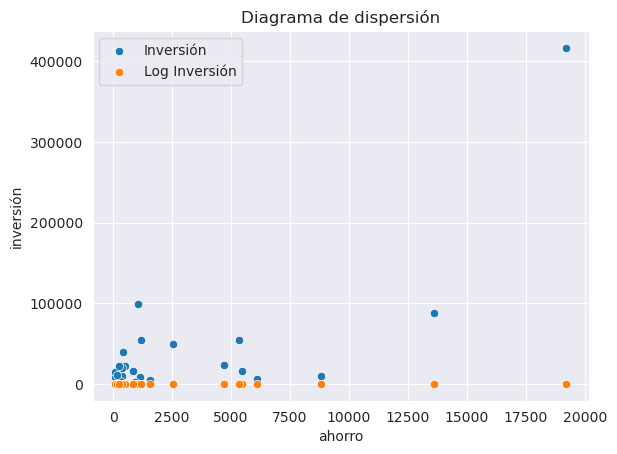

In [122]:
# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the first scatter plot
sns.scatterplot(data=df, x='ahorro', y='inversión', ax=ax, label='Inversión')

# Plot the second scatter plot
sns.scatterplot(data=df, x='ahorro', y='log_inv', ax=ax, label='Log Inversión')

# Add a legend to the plot
ax.legend()

# Add title
plt.title('Diagrama de dispersión')

# Display the plot
plt.show()